# Final Project: Measuring Galaxy Redshift

In [1452]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as scipy

from astropy.io import fits as pyfits

import pietras_functions as pifunc

SDSS_DATA = 'spec-0429-51820-0056.fits.gz'

# From: https://classic.sdss.org/dr6/algorithms/linestable.php -->
# Selected with high weight values

# Emission lines (Ang)
S_II = [6732.67, 6718.29]
H_ALPHA = 6564.61
N_II = [6585.27, 6549.86]
O_III = [5008.240, 4960.295]
H_BETA = 4862.68

# Absorption lines (Ang)

CA_II = [8664.52, 8544.44, 8500.36]
NA = 5895.6
MG = 5176.7 
G = 4305.61
H = 3969.588
K = 3934.777

### 1. Measure the redshift (Δλ / λ) of the galaxy

#### Load in SDSS data and display

In [1453]:
# header = pyfits.getheader(SDSS_DATA) # Find some more details such as units / object id in header

hdulist=pyfits.open(SDSS_DATA)
data = hdulist[1].data
wavelength = 10 ** data['loglam'] # convert from log10 to linear
flux = data['flux']

Text(0.5, 1.0, 'Flux vs Wavelength of SDSS Galaxy: 0429-51817-01')

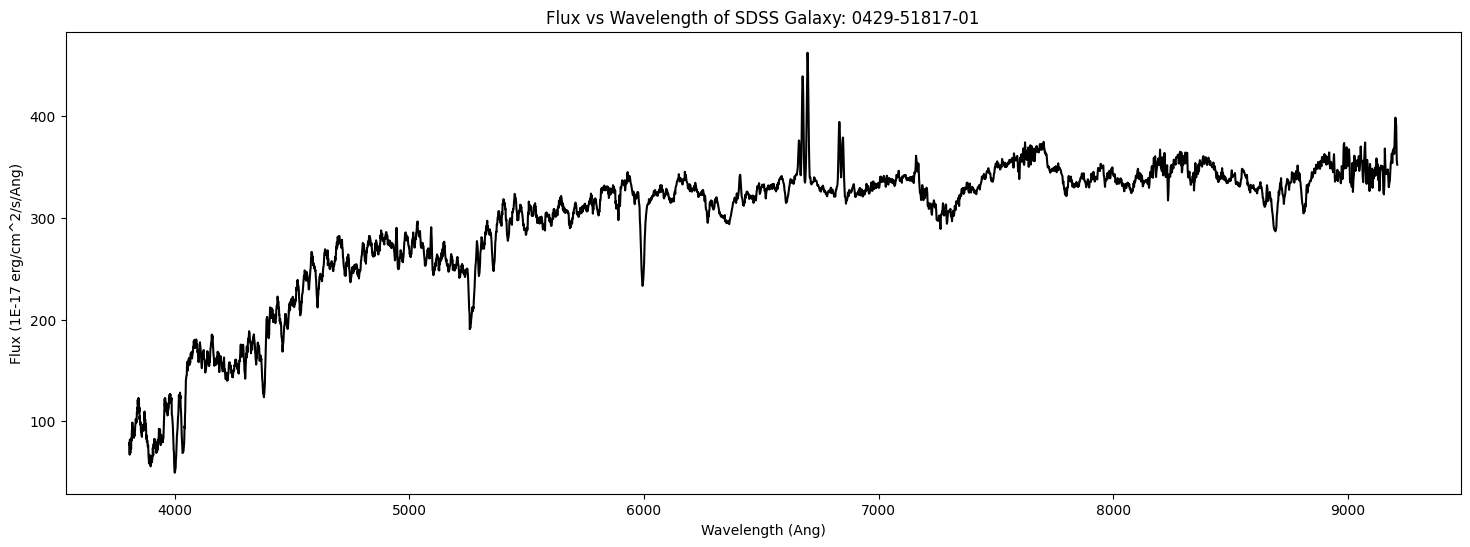

In [1454]:
plt.figure(figsize=(18, 6))
plt.plot(wavelength, flux, color = 'black')
plt.xlabel("Wavelength (Ang)")
plt.ylabel("Flux (1E-17 erg/cm^2/s/Ang)")
plt.title("Flux vs Wavelength of SDSS Galaxy: 0429-51817-01")

#### Identify Areas of Interest

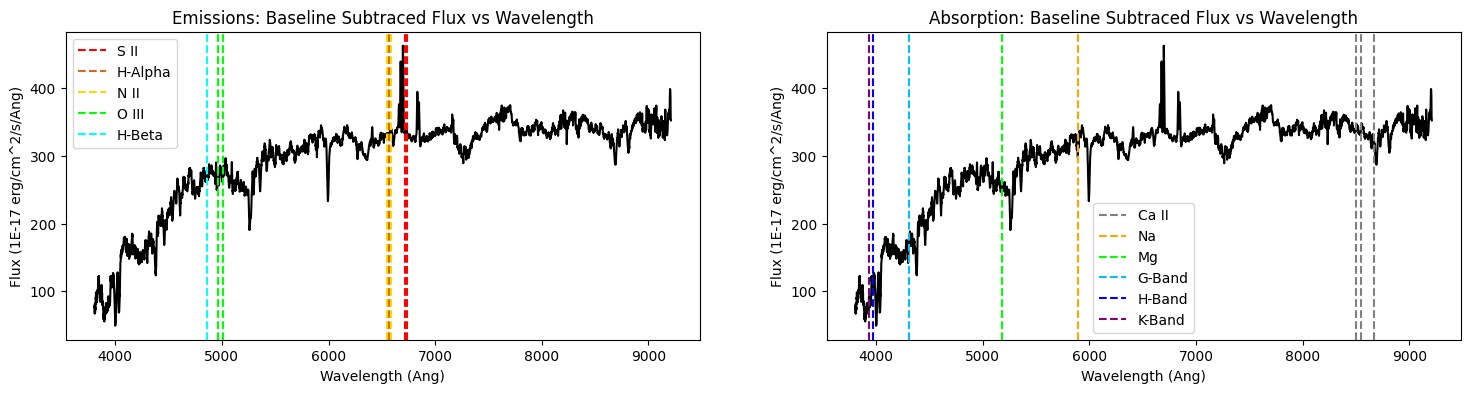

In [1455]:
fig, axs = plt.subplots(1, 2, figsize=(18, 4))

# Emission
axs[0].plot(wavelength, flux, color = 'black')

axs[0].axvline(S_II[0], linestyle= '--', label = 'S II', color = 'red')
axs[0].axvline(S_II[1], linestyle= '--', color = 'red')

axs[0].axvline(H_ALPHA, linestyle= '--', label = 'H-Alpha', color = 'chocolate')

axs[0].axvline(N_II[0], linestyle= '--', label = 'N II', color = 'gold')
axs[0].axvline(N_II[1], linestyle= '--', color = 'gold')

axs[0].axvline(O_III[0], linestyle= '--', label = 'O III', color = 'lime')
axs[0].axvline(O_III[1], linestyle= '--', color = 'lime')

axs[0].axvline(H_BETA, linestyle= '--', label = 'H-Beta', color = 'cyan')

axs[0].set_xlabel("Wavelength (Ang)")
axs[0].set_ylabel("Flux (1E-17 erg/cm^2/s/Ang)")
axs[0].set_title("Emissions: Baseline Subtraced Flux vs Wavelength")
axs[0].legend()

# Absorption

axs[1].plot(wavelength, flux, color = 'black')

axs[1].axvline(CA_II[0], linestyle= '--', label = 'Ca II', color = 'gray')
axs[1].axvline(CA_II[1], linestyle= '--', color = 'gray')
axs[1].axvline(CA_II[2], linestyle= '--', color = 'gray')

axs[1].axvline(NA, linestyle= '--', label = 'Na', color = 'orange')

axs[1].axvline(MG, linestyle= '--', label = 'Mg', color = 'lime')

axs[1].axvline(G, linestyle= '--', label = 'G-Band', color = 'deepskyblue')

axs[1].axvline(H, linestyle= '--', label = 'H-Band', color = 'blue')

axs[1].axvline(K, linestyle= '--', label = 'K-Band', color = 'purple')

axs[1].set_xlabel("Wavelength (Ang)")
axs[1].set_ylabel("Flux (1E-17 erg/cm^2/s/Ang)")
axs[1].set_title("Absorption: Baseline Subtraced Flux vs Wavelength")
axs[1].legend()


#### Evaluate Emission / Absorption Line Prominence

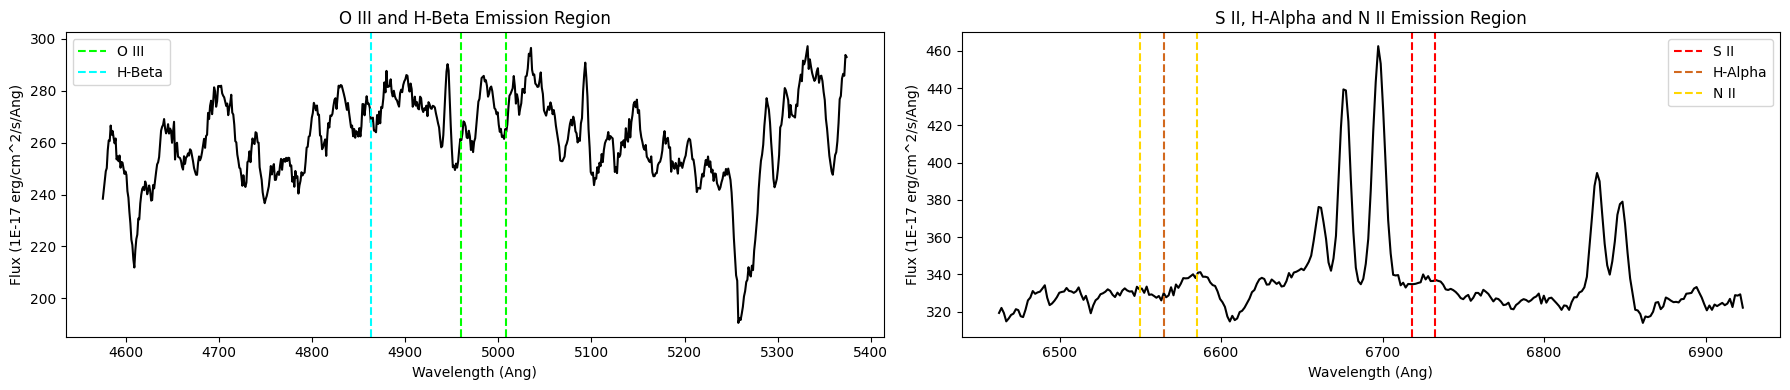

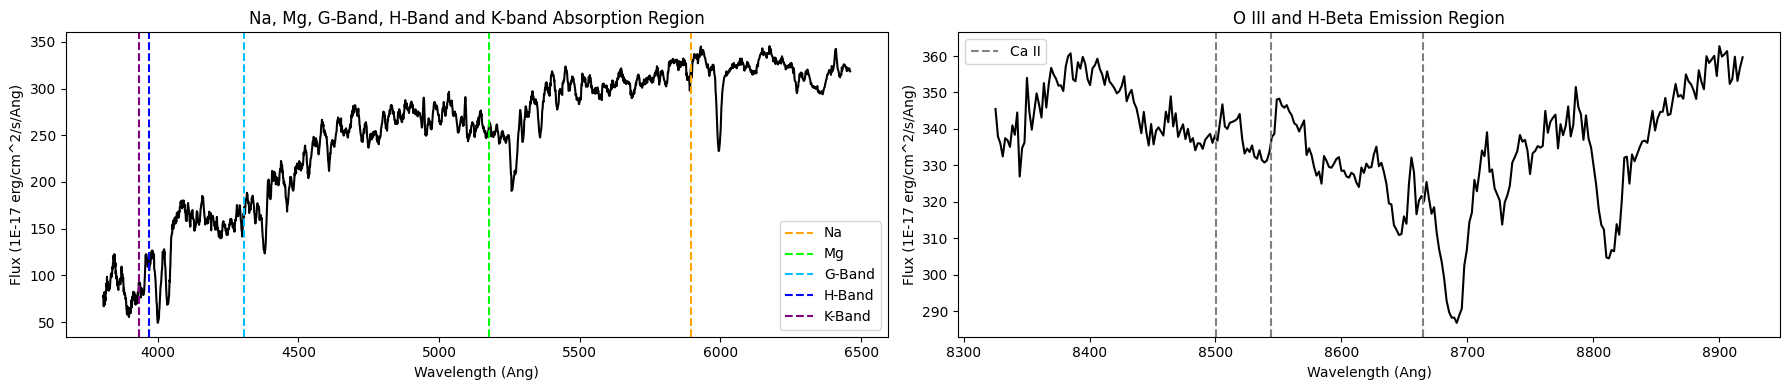

In [1456]:
# Emission

fig, axs = plt.subplots(1, 2, figsize=(18, 4))

# Area 1

axs[0].plot(wavelength[800:1500], flux[800:1500], color = 'black')

axs[0].axvline(O_III[0], linestyle= '--', label = 'O III', color = 'lime')
axs[0].axvline(O_III[1], linestyle= '--', color = 'lime')

axs[0].axvline(H_BETA, linestyle= '--', label = 'H-Beta', color = 'cyan')

axs[0].set_xlabel("Wavelength (Ang)")
axs[0].set_ylabel("Flux (1E-17 erg/cm^2/s/Ang)")
axs[0].set_title("O III and H-Beta Emission Region")
axs[0].legend()

# Area 2

axs[1].plot(wavelength[2300:2600], flux[2300:2600], color = 'black')

axs[1].axvline(S_II[0], linestyle= '--', label = 'S II', color = 'red')
axs[1].axvline(S_II[1], linestyle= '--', color = 'red')

axs[1].axvline(H_ALPHA, linestyle= '--', label = 'H-Alpha', color = 'chocolate')

axs[1].axvline(N_II[0], linestyle= '--', label = 'N II', color = 'gold')
axs[1].axvline(N_II[1], linestyle= '--', color = 'gold')

axs[1].set_xlabel("Wavelength (Ang)")
axs[1].set_ylabel("Flux (1E-17 erg/cm^2/s/Ang)")
axs[1].set_title("S II, H-Alpha and N II Emission Region")
axs[1].legend()

plt.tight_layout()
plt.show()

# Absorption

fig, axs = plt.subplots(1, 2, figsize=(18, 4))

# Area 1

axs[0].plot(wavelength[:2300], flux[:2300], color = 'black')

axs[0].axvline(NA, linestyle= '--', label = 'Na', color = 'orange')

axs[0].axvline(MG, linestyle= '--', label = 'Mg', color = 'lime')

axs[0].axvline(G, linestyle= '--', label = 'G-Band', color = 'deepskyblue')

axs[0].axvline(H, linestyle= '--', label = 'H-Band', color = 'blue')

axs[0].axvline(K, linestyle= '--', label = 'K-Band', color = 'purple')

axs[0].set_xlabel("Wavelength (Ang)")
axs[0].set_ylabel("Flux (1E-17 erg/cm^2/s/Ang)")
axs[0].set_title("Na, Mg, G-Band, H-Band and K-band Absorption Region")
axs[0].legend()

# Area 2

axs[1].plot(wavelength[3400:3700], flux[3400:3700], color = 'black')

axs[1].axvline(CA_II[0], linestyle= '--', label = 'Ca II', color = 'gray')
axs[1].axvline(CA_II[1], linestyle= '--', color = 'gray')
axs[1].axvline(CA_II[2], linestyle= '--', color = 'gray')

axs[1].set_xlabel("Wavelength (Ang)")
axs[1].set_ylabel("Flux (1E-17 erg/cm^2/s/Ang)")
axs[1].set_title("O III and H-Beta Emission Region")
axs[1].legend()

plt.tight_layout()
plt.show()

In [1457]:
smoothed_flux = scipy.ndimage.gaussian_filter1d(flux, sigma=2) # Smooth out the data to get a better max value

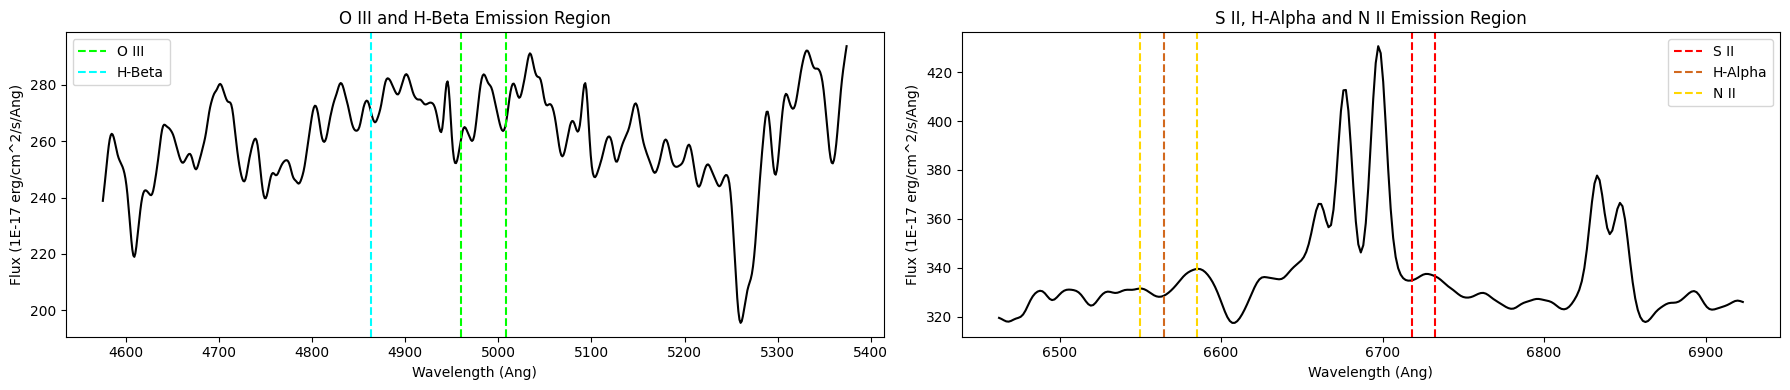

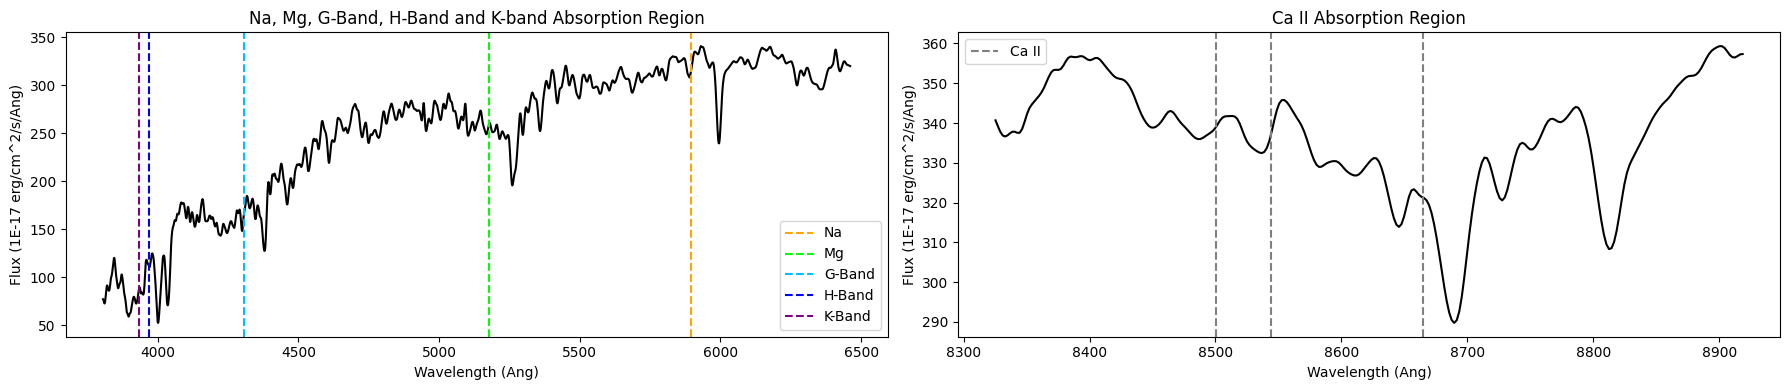

In [1458]:
# Verify spectral lines are still identifiable

# Emission

fig, axs = plt.subplots(1, 2, figsize=(18, 4))

# Area 1

axs[0].plot(wavelength[800:1500], smoothed_flux[800:1500], color = 'black')

axs[0].axvline(O_III[0], linestyle= '--', label = 'O III', color = 'lime')
axs[0].axvline(O_III[1], linestyle= '--', color = 'lime')

axs[0].axvline(H_BETA, linestyle= '--', label = 'H-Beta', color = 'cyan')

axs[0].set_xlabel("Wavelength (Ang)")
axs[0].set_ylabel("Flux (1E-17 erg/cm^2/s/Ang)")
axs[0].set_title("O III and H-Beta Emission Region")
axs[0].legend()

# Area 2

axs[1].plot(wavelength[2300:2600], smoothed_flux[2300:2600], color = 'black')

axs[1].axvline(S_II[0], linestyle= '--', label = 'S II', color = 'red')
axs[1].axvline(S_II[1], linestyle= '--', color = 'red')

axs[1].axvline(H_ALPHA, linestyle= '--', label = 'H-Alpha', color = 'chocolate')

axs[1].axvline(N_II[0], linestyle= '--', label = 'N II', color = 'gold')
axs[1].axvline(N_II[1], linestyle= '--', color = 'gold')

axs[1].set_xlabel("Wavelength (Ang)")
axs[1].set_ylabel("Flux (1E-17 erg/cm^2/s/Ang)")
axs[1].set_title("S II, H-Alpha and N II Emission Region")
axs[1].legend()

plt.tight_layout()
plt.show()

# Absorption

fig, axs = plt.subplots(1, 2, figsize=(18, 4))

# Area 1

axs[0].plot(wavelength[:2300], smoothed_flux[:2300], color = 'black')

axs[0].axvline(NA, linestyle= '--', label = 'Na', color = 'orange')

axs[0].axvline(MG, linestyle= '--', label = 'Mg', color = 'lime')

axs[0].axvline(G, linestyle= '--', label = 'G-Band', color = 'deepskyblue')

axs[0].axvline(H, linestyle= '--', label = 'H-Band', color = 'blue')

axs[0].axvline(K, linestyle= '--', label = 'K-Band', color = 'purple')

axs[0].set_xlabel("Wavelength (Ang)")
axs[0].set_ylabel("Flux (1E-17 erg/cm^2/s/Ang)")
axs[0].set_title("Na, Mg, G-Band, H-Band and K-band Absorption Region")
axs[0].legend()

# Area 2

axs[1].plot(wavelength[3400:3700], smoothed_flux[3400:3700], color = 'black')

axs[1].axvline(CA_II[0], linestyle= '--', label = 'Ca II', color = 'gray')
axs[1].axvline(CA_II[1], linestyle= '--', color = 'gray')
axs[1].axvline(CA_II[2], linestyle= '--', color = 'gray')

axs[1].set_xlabel("Wavelength (Ang)")
axs[1].set_ylabel("Flux (1E-17 erg/cm^2/s/Ang)")
axs[1].set_title("Ca II Absorption Region")
axs[1].legend()

plt.tight_layout()
plt.show()

#### Determine Redshift Values

Based on the above:

The flux is shifted to the right (redshifted--expected) meaning the galaxy is moving away from us.

The quality of each spectral event is in the following order:

1. SII, H-Alpha, N II Emission
2. Na, Mg, G-Band, H-Band and K-band Absorption
3. Ca II Absorption
4. O III and H-Beta Emission Region

#### SII, H-Alpha, N II Emission

[82 91]
S II unshifted bandgap: 14.38000000000011, S II redshifted bandgap: 14.1748046875


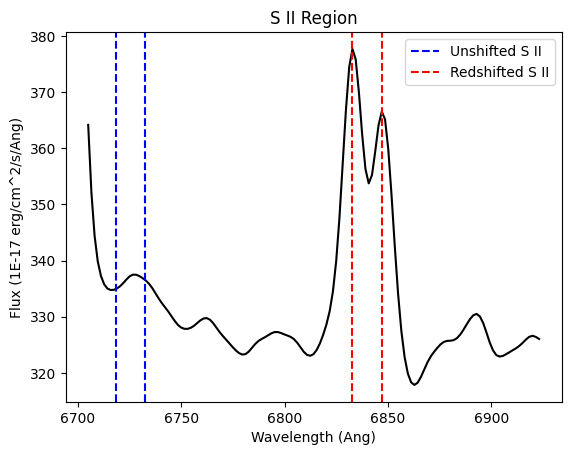

In [1459]:
# SII

max_values = scipy.signal.find_peaks(smoothed_flux[2460:2600], prominence=10)[0]
print(max_values)

shift_S_ii = [wavelength[2460:2600][max_values[1]], wavelength[2460:2600][max_values[0]]]

print(f"S II unshifted bandgap: {S_II[0] - S_II[1]}, S II redshifted bandgap: {shift_S_ii[0] - shift_S_ii[1]}")

plt.plot(wavelength[2460:2600], smoothed_flux[2460:2600], color = 'black')

plt.axvline(S_II[0], linestyle= '--', label = 'Unshifted S II', color = 'blue')
plt.axvline(S_II[1], linestyle= '--', color = 'blue')

plt.axvline(shift_S_ii[0], linestyle= '--', label = 'Redshifted S II', color = 'red')
plt.axvline(shift_S_ii[1], linestyle= '--', color = 'red')

plt.xlabel("Wavelength (Ang)")
plt.ylabel("Flux (1E-17 erg/cm^2/s/Ang)")
plt.title("S II Region")
plt.legend()

[ 42  91 102 115]
N II unshifted bandgap: 35.410000000000764, N II redshifted bandgap: 36.9111328125


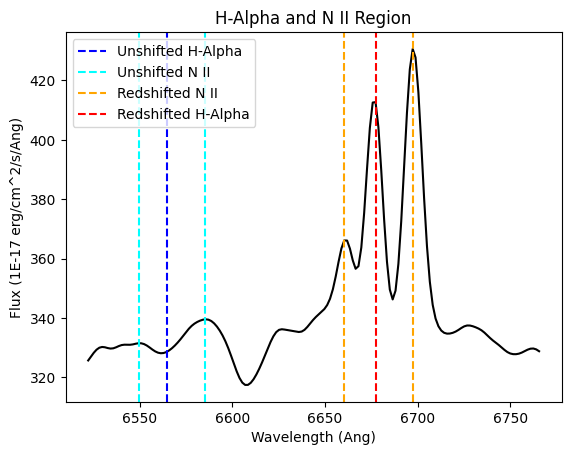

In [1460]:
# H-Alpha and N II

max_values = scipy.signal.find_peaks(smoothed_flux[2340:2500], prominence=7)[0] # index = 1, 3 are Nii, 2 is Ha
print(max_values)

shift_N_ii = [wavelength[2340:2500][max_values[3]], wavelength[2340:2500][max_values[1]]]

shift_H_alpha = wavelength[2340:2500][max_values[2]]

print(f"N II unshifted bandgap: {N_II[0] - N_II[1]}, N II redshifted bandgap: {shift_N_ii[0] - shift_N_ii[1]}")

plt.plot(wavelength[2340:2500], smoothed_flux[2340:2500], color = 'black')

plt.axvline(H_ALPHA, linestyle= '--', label = 'Unshifted H-Alpha', color = 'blue')

plt.axvline(N_II[0], linestyle= '--', label = 'Unshifted N II', color = 'cyan')
plt.axvline(N_II[1], linestyle= '--', color = 'cyan')

plt.axvline(shift_N_ii[0], linestyle= '--', label = 'Redshifted N II', color = 'orange')
plt.axvline(shift_N_ii[1], linestyle= '--', color = 'orange')

plt.axvline(shift_H_alpha, linestyle= '--', label = 'Redshifted H-Alpha', color = 'red')

plt.xlabel("Wavelength (Ang)")
plt.ylabel("Flux (1E-17 erg/cm^2/s/Ang)")
plt.title("H-Alpha and N II Region")
plt.legend()

# for value in max_values:
#     plt.axvline(wavelength[2340:2500][value], linestyle= '--', color = 'green')

#### Na, Mg, G-Band, H-Band and K-band Absorption

[  8  19  47  69  99 124 168 190]


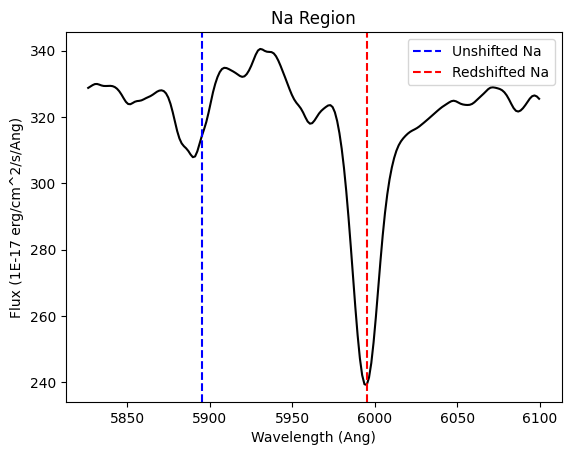

In [1461]:
# Na

min_values = scipy.signal.argrelmin(smoothed_flux[1850:2050])[0] # index = 5
print(min_values)

shift_Na = wavelength[1850:2050][min_values[5]]

plt.plot(wavelength[1850:2050], smoothed_flux[1850:2050], color = 'black')

plt.axvline(NA, linestyle= '--', label = 'Unshifted Na', color = 'blue')

plt.axvline(shift_Na, linestyle= '--', label = 'Redshifted Na', color = 'red')

plt.xlabel("Wavelength (Ang)")
plt.ylabel("Flux (1E-17 erg/cm^2/s/Ang)")
plt.title("Na Region")
plt.legend()

[ 29  49  69  87 106 137 152 172 187]


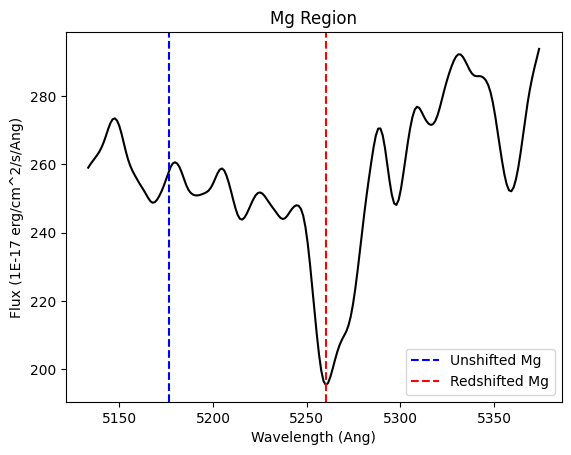

In [1462]:
# Mg

min_values = scipy.signal.argrelmin(smoothed_flux[1300:1500])[0] # index = 4
print(min_values)

shift_Mg = wavelength[1300:1500][min_values[4]]

plt.plot(wavelength[1300:1500], smoothed_flux[1300:1500], color = 'black')

plt.axvline(MG, linestyle= '--', label = 'Unshifted Mg', color = 'blue')

plt.axvline(shift_Mg, linestyle= '--', label = 'Redshifted Mg', color = 'red')

plt.xlabel("Wavelength (Ang)")
plt.ylabel("Flux (1E-17 erg/cm^2/s/Ang)")
plt.title("Mg Region")
plt.legend()

[  2  16  31  58  78 110 130 142 158 189 209 228 238]


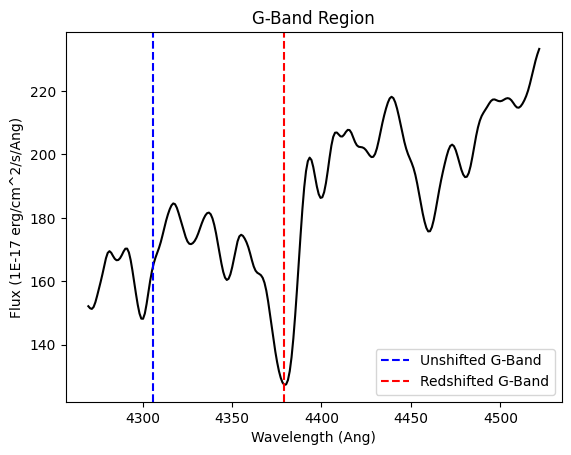

In [1463]:
# G-band

min_values = scipy.signal.argrelmin(smoothed_flux[500:750])[0] # index = 5
print(min_values)

shift_G = wavelength[500:750][min_values[5]]

plt.plot(wavelength[500:750], smoothed_flux[500:750], color = 'black')

plt.axvline(G, linestyle= '--', label = 'Unshifted G-Band', color = 'blue')

plt.axvline(shift_G, linestyle= '--', label = 'Redshifted G-Band', color = 'red')

plt.xlabel("Wavelength (Ang)")
plt.ylabel("Flux (1E-17 erg/cm^2/s/Ang)")
plt.title("G-Band Region")
plt.legend()

[ 11  53  82 102 110 134 168 205 235 246 261 275 290]


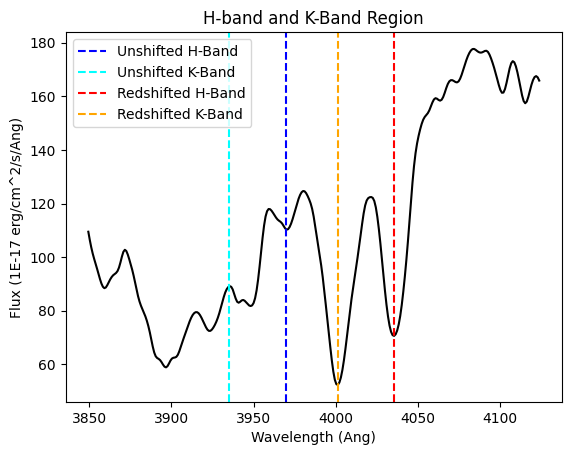

In [1464]:
# H-band and K-Band

min_values = scipy.signal.argrelmin(smoothed_flux[50:350])[0] # index = 6, 7
print(min_values)

shift_H = wavelength[50:350][min_values[7]]
shift_K = wavelength[50:350][min_values[6]]

plt.plot(wavelength[50:350], smoothed_flux[50:350], color = 'black')

plt.axvline(H, linestyle= '--', label = 'Unshifted H-Band', color = 'blue')
plt.axvline(K, linestyle= '--', label = 'Unshifted K-Band', color = 'cyan')

plt.axvline(shift_H, linestyle= '--', label = 'Redshifted H-Band', color = 'red')
plt.axvline(shift_K, linestyle= '--', label = 'Redshifted K-Band', color = 'orange')

plt.xlabel("Wavelength (Ang)")
plt.ylabel("Flux (1E-17 erg/cm^2/s/Ang)")
plt.title("H-band and K-Band Region")
plt.legend()

# for value in min_values:
#     plt.axvline(wavelength[50:350][value], linestyle= '--', color = 'green')


#### Ca II Absorption

[ 15  33  59  82  97 114 136 155 166 178 197 246]
Ca II unshifted widest bandgap: 164.15999999999985, S II redshifted widest bandgap: 166.822265625
Ca II unshifted mid bandgap: 120.07999999999993, S II redshifted mid bandgap: 122.9169921875
Ca II unshifted narrowest bandgap: 44.07999999999993, S II redshifted narrowest bandgap: 43.9052734375


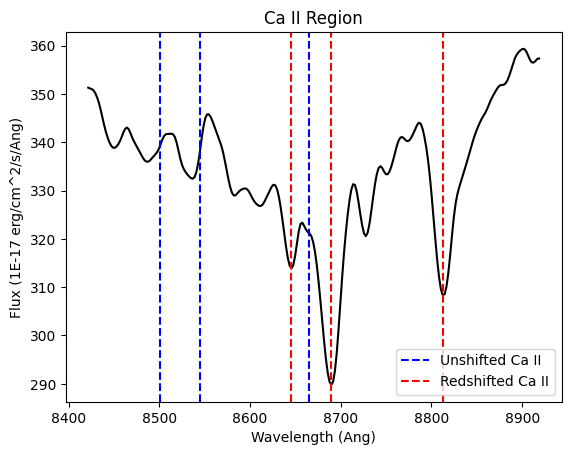

In [1465]:
# Ca II

min_values = scipy.signal.argrelmin(smoothed_flux[3450:3700])[0] # index = 5, 6, 7
print(min_values)

shift_Ca_ii =[wavelength[3450:3700][min_values[10]],wavelength[3450:3700][min_values[6]],wavelength[3450:3700][min_values[5]]]

print(f"Ca II unshifted widest bandgap: {CA_II[0] - CA_II[2]}, S II redshifted widest bandgap: {shift_Ca_ii[0] - shift_Ca_ii[2]}")
print(f"Ca II unshifted mid bandgap: {CA_II[0] - CA_II[1]}, S II redshifted mid bandgap: {shift_Ca_ii[0] - shift_Ca_ii[1]}")
print(f"Ca II unshifted narrowest bandgap: {CA_II[1] - CA_II[2]}, S II redshifted narrowest bandgap: {shift_Ca_ii[1] - shift_Ca_ii[2]}")

plt.plot(wavelength[3450:3700], smoothed_flux[3450:3700], color = 'black')

plt.axvline(CA_II[0], linestyle= '--', label = 'Unshifted Ca II', color = 'blue')
plt.axvline(CA_II[1], linestyle= '--', color = 'blue')
plt.axvline(CA_II[2], linestyle= '--', color = 'blue')

plt.axvline(shift_Ca_ii[0], linestyle= '--', label = 'Redshifted Ca II', color = 'red')
plt.axvline(shift_Ca_ii[1], linestyle= '--', color = 'red')
plt.axvline(shift_Ca_ii[2], linestyle= '--', color = 'red')

plt.xlabel("Wavelength (Ang)")
plt.ylabel("Flux (1E-17 erg/cm^2/s/Ang)")
plt.title("Ca II Region")
plt.legend()

#### O III and H-Beta Emission Region

This area seems to not be worth the effort to extract data from. There are too many peaks to accuratly determine the redshifted location.
As such these will not be computed.

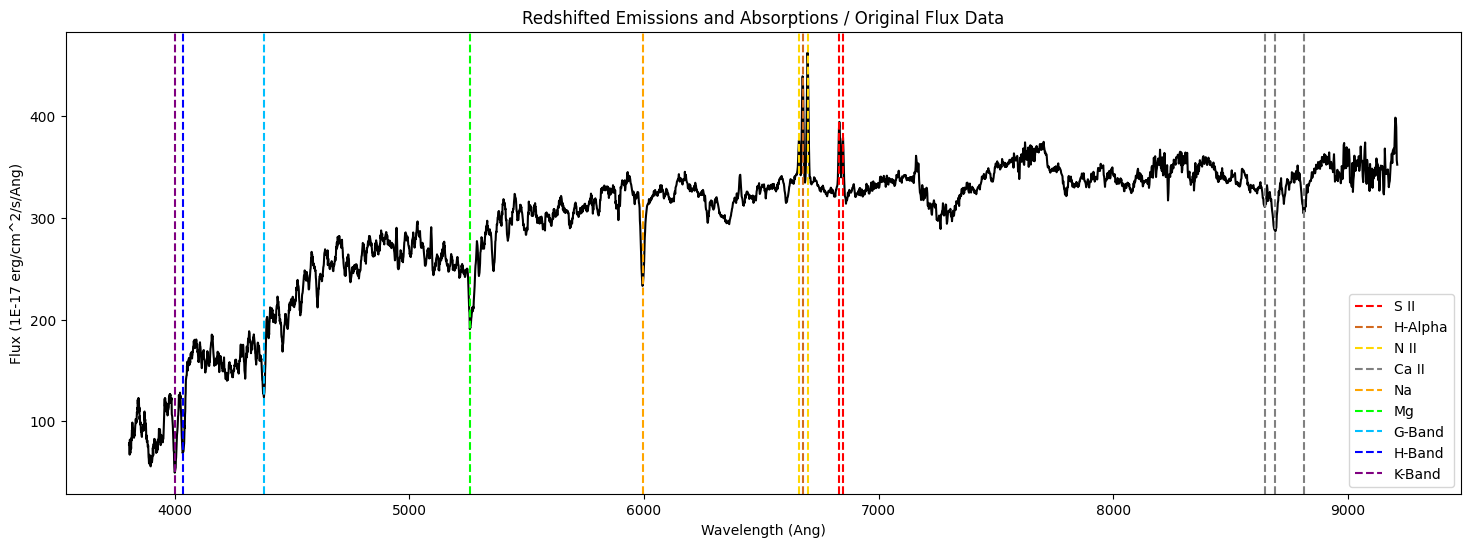

In [1466]:
# Reproduce figure of full data with redshifts

plt.figure(figsize=(18, 6))

plt.plot(wavelength, flux, color = 'black')

plt.axvline(shift_S_ii[0], linestyle= '--', label = 'S II', color = 'red')
plt.axvline(shift_S_ii[1], linestyle= '--', color = 'red')

plt.axvline(shift_H_alpha, linestyle= '--', label = 'H-Alpha', color = 'chocolate')

plt.axvline(shift_N_ii[0], linestyle= '--', label = 'N II', color = 'gold')
plt.axvline(shift_N_ii[1], linestyle= '--', color = 'gold')

plt.axvline(shift_Ca_ii[0], linestyle= '--', label = 'Ca II', color = 'gray')
plt.axvline(shift_Ca_ii[1], linestyle= '--', color = 'gray')
plt.axvline(shift_Ca_ii[2], linestyle= '--', color = 'gray')

plt.axvline(shift_Na, linestyle= '--', label = 'Na', color = 'orange')

plt.axvline(shift_Mg, linestyle= '--', label = 'Mg', color = 'lime')

plt.axvline(shift_G, linestyle= '--', label = 'G-Band', color = 'deepskyblue')

plt.axvline(shift_H, linestyle= '--', label = 'H-Band', color = 'blue')

plt.axvline(shift_K, linestyle= '--', label = 'K-Band', color = 'purple')

plt.xlabel("Wavelength (Ang)")
plt.ylabel("Flux (1E-17 erg/cm^2/s/Ang)")
plt.title("Redshifted Emissions and Absorptions / Original Flux Data")
plt.legend()

#### Redshift Evaluation and Compilation

In [1467]:
def compute_z(lambda_obs, lambda_rest):
    """
    Computes the redshift given the observed and rest wavelengths.
    Given parameters may be a single float pair or float array pair.
   
    Parameters
    ----------
    lambda_obs : np.float32, nd.array
        The observed wavelength(s)

    lambda_rest : np.float32, nd.array
        The rest wavelength(s)
    
    Returns
    -------
    float
        The redshift z

    z_array : nd.array
        Array of redshift values z for each given wavelength pair
    """
    
    if type(lambda_obs) == np.float32:
        return (lambda_obs - lambda_rest) / lambda_rest
    else:
        lambda_obs = np.array(lambda_obs) # ensure np
        lambda_rest = np.array(lambda_rest)

        z_array = []

        for i in range(lambda_obs.size):
            obs = lambda_obs[i]
            rest = lambda_rest[i]
            z_array.append((obs - rest) / rest)

        return z_array

In [1468]:
z_S_ii = compute_z(shift_S_ii, S_II)
z_H_alpha = compute_z(shift_H_alpha, H_ALPHA)
z_N_ii = compute_z(shift_N_ii, N_II)
z_Na = compute_z(shift_Na, NA)
z_Mg = compute_z(shift_Mg, MG)
z_G = compute_z(shift_G, G)
z_H = compute_z(shift_H, H)
z_K = compute_z(shift_K, K)
z_Ca_ii = compute_z(shift_Ca_ii, CA_II)

print(f"S II z value: {z_S_ii}")
print(f"H-Alpha z value: {z_H_alpha}")
print(f"N II z value: {z_N_ii}")
print(f"Na z value: {z_Na}")
print(f"Mg z value: {z_Mg}")
print(f"G-Band z value: {z_G}")
print(f"H-Band z value: {z_H}")
print(f"K-Band z value: {z_K}")
print(f"Ca II z value: {z_Ca_ii}")

S II z value: [0.016980578122238268, 0.017047466575386003]
H-Alpha z value: 0.017164177736758213
N II z value: [0.01701299654854692, 0.016875787111289453]
Na z value: 0.016885540169787574
Mg z value: 0.016124628292396737
G-Band z value: 0.017104061438158666
H-Band z value: 0.01661057683678377
K-Band z value: 0.016903890376125497
Ca II z value: [0.017081099847423696, 0.016989122641448647, 0.017097777697062173]


### 2. Evaluate the uncertainty in that measurement (in your measurement, not the data)

Mean z value: 1.6914E-02 +- 8.29E-04
z value std: 2.7623E-04


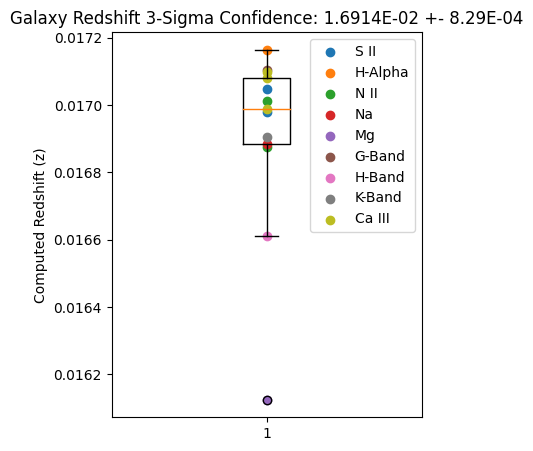

In [1469]:
all_z = [z_S_ii[0], z_S_ii[1],
            z_H_alpha, 
            z_N_ii[0], z_N_ii[1],
            z_Na,
            z_Mg,
            z_G,
            z_H,
            z_K, 
            z_Ca_ii[0], z_Ca_ii[1], z_Ca_ii[2]]

mean_z = np.mean(all_z)
z_std = np.std(all_z, ddof=1)

print(f"Mean z value: {mean_z:.4E} +- {3 * z_std:.2E}") # 3 sigma
print(f"z value std: {z_std:.4E}")
         
plt.figure(figsize=(4, 5))
plt.scatter([1, 1], z_S_ii, label ='S II')
plt.scatter(1, z_H_alpha, label = 'H-Alpha')
plt.scatter([1, 1], z_N_ii, label = 'N II')
plt.scatter(1, z_Na, label = 'Na')
plt.scatter(1, z_Mg, label = 'Mg')
plt.scatter(1, z_G, label = 'G-Band')
plt.scatter(1, z_H, label = 'H-Band')
plt.scatter(1, z_K, label = 'K-Band')
plt.scatter([1, 1, 1], z_Ca_ii, label = 'Ca III')

plt.ylabel("Computed Redshift (z)")
plt.title(f"Galaxy Redshift 3-Sigma Confidence: {mean_z:.4E} +- {3 * z_std:.2E}")
plt.boxplot(all_z)
plt.legend()

### 3. Determine how the uncertainty scales with the number of spectral lines used to measure the redshift

Text(0.5, 1.0, 'Number of Spectral Lines vs Redshift Standard Deviation')

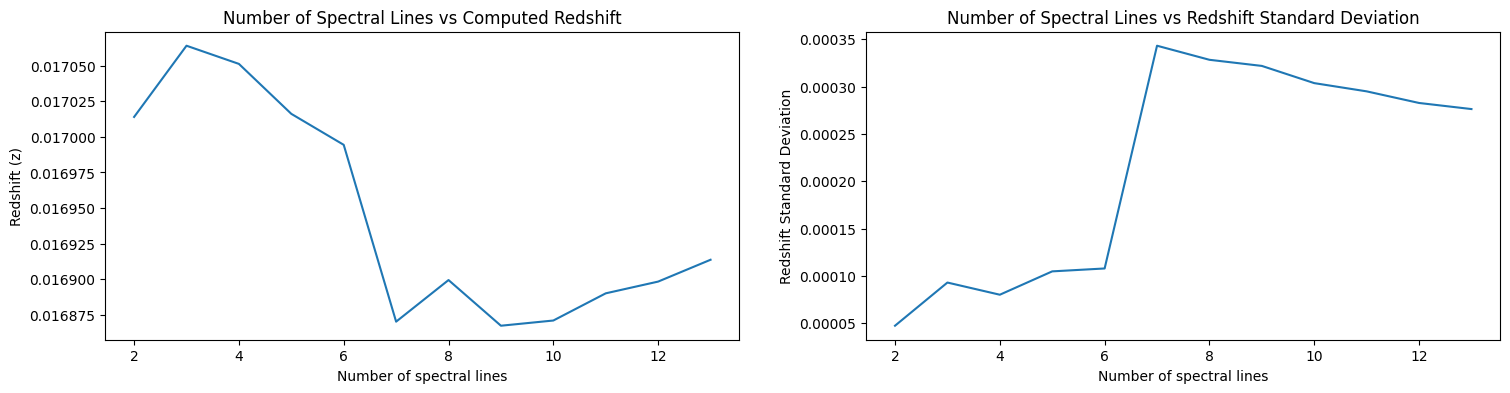

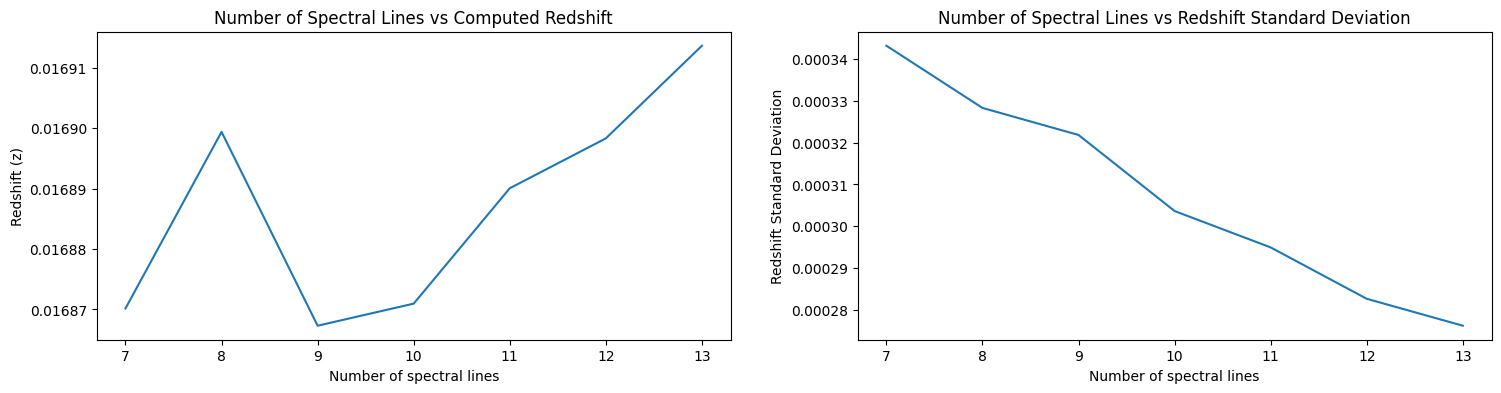

In [1470]:
n_lines = []
val_std = []
val_z = []

for i in range(2, len(all_z) + 1):
    zs = []
    for j in range(0, i):
        zs.append(all_z[j])
    
    next_std = np.std(zs, ddof=1)
    next_z_mean = np.mean(zs)

    n_lines.append(i)
    val_std.append(next_std)
    val_z.append(next_z_mean)

fig, axs = plt.subplots(1, 2, figsize=(18, 4))

axs[0].plot(n_lines, val_z)
axs[0].set_xlabel("Number of spectral lines")
axs[0].set_ylabel("Redshift (z)")
axs[0].set_title("Number of Spectral Lines vs Computed Redshift")

axs[1].plot(n_lines, val_std)
axs[1].set_xlabel("Number of spectral lines")
axs[1].set_ylabel("Redshift Standard Deviation")
axs[1].set_title("Number of Spectral Lines vs Redshift Standard Deviation")


fig, axs = plt.subplots(1, 2, figsize=(18, 4))

axs[0].plot(n_lines[5:], val_z[5:])
axs[0].set_xlabel("Number of spectral lines")
axs[0].set_ylabel("Redshift (z)")
axs[0].set_title("Number of Spectral Lines vs Computed Redshift")

axs[1].plot(n_lines[5:], val_std[5:])
axs[1].set_xlabel("Number of spectral lines")
axs[1].set_ylabel("Redshift Standard Deviation")
axs[1].set_title("Number of Spectral Lines vs Redshift Standard Deviation")

### 4. Determine if there are any significant systematic differences between measurements using different lines, or if there are any significant trends in the red shift measurement with wavelength


#### Absorption vs Emission

Mean absorption z value: 1.6850E-02 +- 1.01E-03
Absorption z value std: 3.3517E-04
Mean emission z value: 1.7016E-02 +- 3.14E-04
Absorption z value std: 1.0473E-04


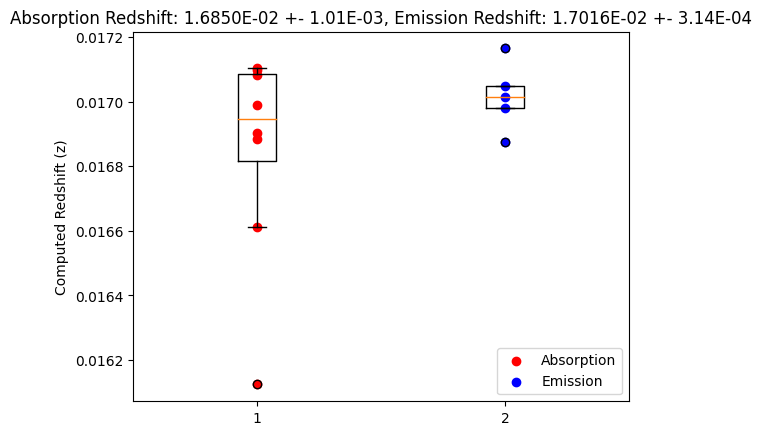

In [1471]:
absorption_z = [z_Na,
            z_Mg,
            z_G,
            z_H,
            z_K, 
            z_Ca_ii[0], z_Ca_ii[1], z_Ca_ii[2]]

emission_z = [z_S_ii[0], z_S_ii[1],
            z_H_alpha, 
            z_N_ii[0], z_N_ii[1]]


absorption_mean_z = np.mean(absorption_z)
absorption_z_std = np.std(absorption_z, ddof=1)

emission_mean_z = np.mean(emission_z)
emission_z_std = np.std(emission_z, ddof=1)

print(f"Mean absorption z value: {absorption_mean_z:.4E} +- {3 * absorption_z_std:.2E}") # 3 sigma
print(f"Absorption z value std: {absorption_z_std:.4E}")

print(f"Mean emission z value: {emission_mean_z:.4E} +- {3 * emission_z_std:.2E}") # 3 sigma
print(f"Absorption z value std: {emission_z_std:.4E}")

plt.scatter(1, z_Na, color = 'red', label = 'Absorption')
plt.scatter(1, z_Mg, color = 'red')
plt.scatter(1, z_G, color = 'red')
plt.scatter(1, z_H, color = 'red')
plt.scatter(1, z_K, color = 'red')
plt.scatter([1, 1, 1], z_Ca_ii, color = 'red')

plt.scatter([2, 2], z_S_ii, color = 'blue', label ='Emission')
plt.scatter(2, z_H_alpha, color = 'blue')
plt.scatter([2, 2], z_N_ii, color = 'blue')

plt.ylabel("Computed Redshift (z)")
plt.title(f"Absorption Redshift: {absorption_mean_z:.4E} +- {3 * absorption_z_std:.2E}, Emission Redshift: {emission_mean_z:.4E} +- {3 * emission_z_std:.2E}")
plt.boxplot([absorption_z, emission_z])
plt.legend()

#### Wavelength Trends

Linear: chi^2: 4.397741459180539e-05, p-val: 1.0
Cubic: chi^2: 3.108977343763107e-05, p-val: 1.0


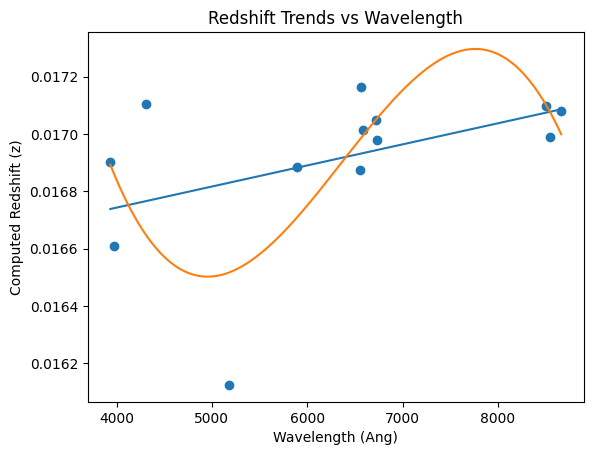

In [1472]:
sorted_wavelengths = [
    CA_II[0], CA_II[1], CA_II[2], #z_Ca_ii[0], z_Ca_ii[1], z_Ca_ii[2]]
    S_II[0], S_II[1], #z_S_ii[0], z_S_ii[1],
    H_ALPHA, #z_H_alpha, 
    N_II[0], N_II[1], #z_N_ii[0], z_N_ii[1],
    NA, #z_Na,
    MG, #z_Mg,
    G, #z_G,
    H, #z_H,
    K #z_K, 
]

sorted_all_z = [
    z_Ca_ii[0], z_Ca_ii[1], z_Ca_ii[2],
    z_S_ii[0], z_S_ii[1],
    z_H_alpha, 
    z_N_ii[0], z_N_ii[1],
    z_Na,
    z_Mg,
    z_G,
    z_H,
    z_K
]

fit_wavelength = np.linspace(sorted_wavelengths[0], sorted_wavelengths[-1], 100)

linear_coeffs = np.polyfit(sorted_wavelengths, sorted_all_z, deg=1)
linear = np.poly1d(linear_coeffs)

cube_coeffs = np.polyfit(sorted_wavelengths, sorted_all_z, deg=3)
cubed = np.poly1d(cube_coeffs)

plt.scatter(sorted_wavelengths, sorted_all_z)

plt.plot(fit_wavelength, linear(fit_wavelength), label = 'linear fit')
plt.plot(fit_wavelength, cubed(fit_wavelength))
plt.xlabel("Wavelength (Ang)")
plt.ylabel("Computed Redshift (z)")
plt.title("Redshift Trends vs Wavelength")

linear_x2, linear_pval = pifunc.chisquared(sorted_all_z, linear(sorted_wavelengths))
cube_x2, cube_pval = pifunc.chisquared(sorted_all_z, cubed(sorted_wavelengths))

print(f"Linear: chi^2: {linear_x2}, p-val: {linear_pval}")
print(f"Cubic: chi^2: {cube_x2}, p-val: {cube_pval}")